A particularly common type of feature is the **categorical features**. Also known as discrete features, these are usually **not numeric**. The distinction between categorical features and continuous features is analogous to the distinction between classification and regression,only on the input side rather than the output side.

Regardless of the types of features your data consists of, how you represent them can have an enormous effect on the performance of machine learning models.

The question of how to represent your data best for a particular application is known as **feature engineering**. Representing your data in
the right way can have a bigger influence on the performance of a supervised model than the exact parameters you choose.


## Categorical Variables

### One-Hot Encoding

The task of the adult dataset is to predict whether a
worker has an income of over $50,000 or under $50,000. The features in this dataset
include the workers’ ages, how they are employed (self employed, private industry
employee, government employee, etc.), their education, their gender, their working
hours per week, occupation, and more

In this dataset, age and hours-per-week are continuous features, which we know
how to treat. The workclass, education, sex, and occupation features are categori‐
cal, however

By far the most common way to represent categorical variables is using the **one-hotencoding** or **one-out-of-N encoding**, also known as **dummy variables.**

The idea behind dummy variables is to **replace a categorical variable with one or more new features that can have the values 0 and 1**. The values 0 and 1 make sense in the formula for linear binary classification (and for all other models in scikit-learn), and we can represent any number of categories by introducing one new feature per category, as described here.

Let’s say for the workclass feature we have possible values of "Government
Employee", "Private Employee", "Self Employed", and "Self Employed Incorpo
rated". To encode these four possible values, we create four new features, called "Government Employee", "Private Employee", "Self Employed", and "Self Employed Incorporated". A feature is 1 if workclass for this person has the corresponding value and 0 otherwise, so exactly one of the four new features will be 1 for each data point. This is why this is called **one-hot or one-out-of-N encoding.**

There is a very simple way to encode the data in pandas, using the **get_dummies function.** The get_dummies function automatically transforms all columns that have object type (like strings) or are categorical 

In [14]:
import pandas as pd
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
data = pd.read_csv(
 "data/adult.data", header=None, index_col=False,
 names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
 'marital-status', 'occupation', 'relationship', 'race', 'gender',
 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
 'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
 'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())


,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


After reading a dataset like this, it is often good to first check if a column actually contains meaningful categorical data. When working with data that was input by humans there might not be a fixed set of categories, and differences in spelling and capitalization might require preprocessing.

In [15]:
print(data.gender.value_counts())
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))
#After One-Hot encoding
data_dummies.head()

gender
 Male      21790
 Female    10771
Name: count, dtype: int64
Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-f

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,50,13,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,38,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,53,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,28,40,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [16]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


c:\Users\bapdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Often, whether for ease of storage or
because of the way the data is collected, categorical variables are encoded as integers. That they are numbers doesn’t mean that they should necessarily be treated as continuous features. It is not always clear whether an integer fea‐
ture should be treated as continuous or discrete.

The get_dummies function in pandas treats all numbers as continuous and will not create dummy variables for them. To get around this, you can either use scikitlearn’s **OneHotEncoder**, for which you can specify which variables are continuous and which are discrete, or convert numeric columns in the DataFrame to strings.


In [18]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [19]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


In [20]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,True,False,False,False,False,True
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,False,True,False,True,False,False


In [26]:
from sklearn.preprocessing import OneHotEncoder
# Setting sparse_output=False means OneHotEncoder will return a numpy array, not a sparse matrix
ohe = OneHotEncoder(sparse_output=False)
print(ohe.fit_transform(demo_df))
print(ohe.get_feature_names_out())

[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0.]]
['Integer Feature_0' 'Integer Feature_1' 'Integer Feature_2'
 'Categorical Feature_box' 'Categorical Feature_fox'
 'Categorical Feature_socks']


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

ct = ColumnTransformer(
    transformers=[
        ("scaling", StandardScaler(), ['age', 'hours-per-week']),
        ("onehot", OneHotEncoder(sparse_output=False), ['workclass', 'education', 'gender', 'occupation'])
    ],
    remainder='passthrough'  # Optional: specify how to handle the remaining columns
)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# get all columns apart from income for the features
data_features = data.drop("income", axis=1)
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

(24420, 44)
Test score: 0.81


## Binning, Discretization, Linear Models, and Trees

The best way to represent data depends not only on the semantics of the data, but also on the **kind of model you are using**. Linear models and tree-based models (such as decision trees, gradient boosted trees, and random forests), two large and very commonly used families, have very different properties when it comes to how they work with different feature representations.

One way to make linear models more powerful on continuous data is to use binning
(also known as discretization) of the feature to split it up into multiple features

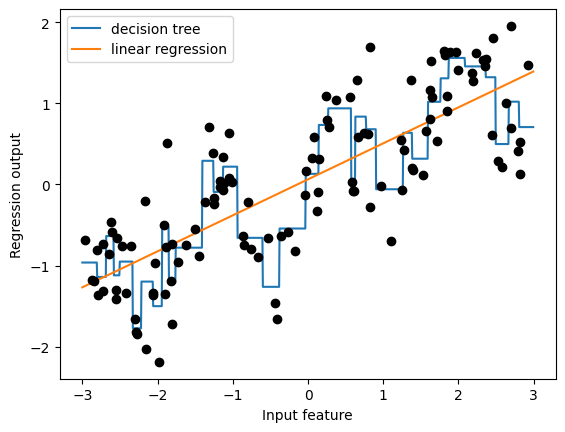

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
import mglearn
X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

We imagine a partition of the input range for the feature (in this case, the numbers
from –3 to 3) into a fixed number of bins—say, 10. A data point will then be repre‐
sented by which bin it falls into. To determine this, we first have to define the bins. In
this case, we’ll define 10 bins equally spaced between –3 and 3

In [34]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]

Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


What we did here is transform the single continuous input feature in the wave dataset
into a categorical feature that encodes which bin a data point is in.

In [38]:
from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Text(0.5, 0, 'Input feature')

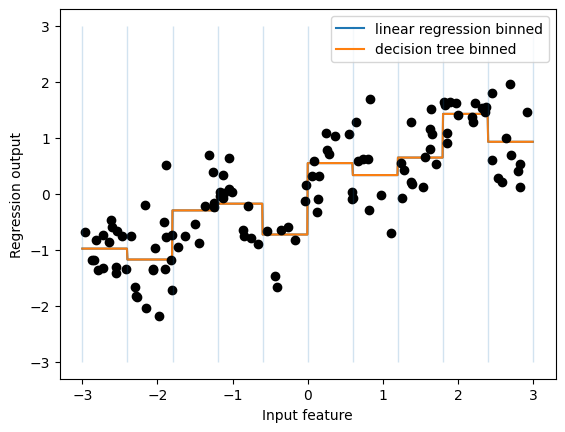

In [44]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")


## Interactions and Polynomials

Another way to enrich a feature representation, particularly for linear models, is
adding **interaction features and polynomial features** of the original data.

(120, 11)


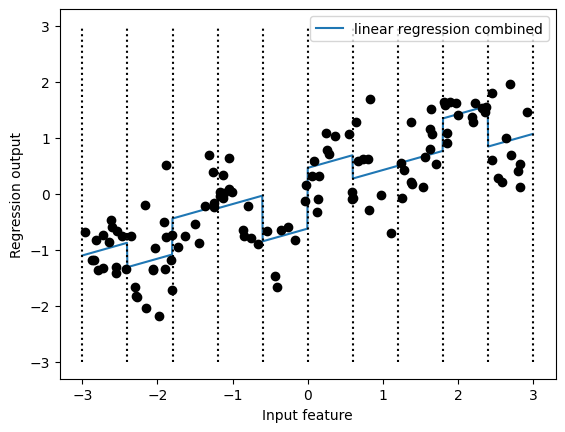

In [49]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
for bin in bins:
 plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')


In this example, the model learned an offset for each bin, together with a slope. The
learned slope is downward, and shared across all the bins—there is a single x-axis fea‐
ture, which has a single slope. Because the slope is shared across all bins, it doesn’t
seem to be very helpful. We would rather have a separate slope for each bin! We can
achieve this by adding an interaction or product feature that indicates which bin a
data point is in and where it lies on the x-axis. This feature is a product of the bin
indicator and the original feature

(120, 20)


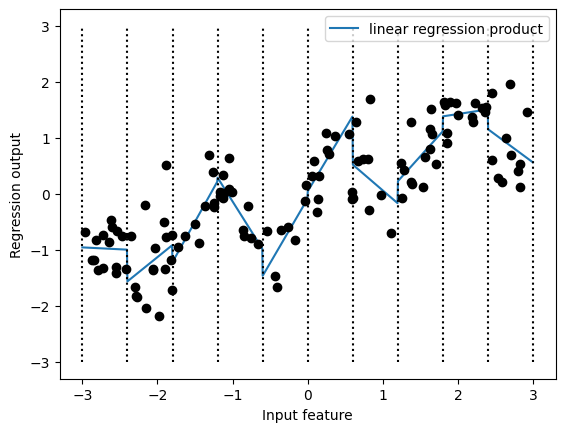

In [51]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')
for bin in bins:
 plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")


Using binning is one way to expand a continuous feature. Another one is to use poly‐
nomials of the original features. For a given feature x, we might want to consider
x ** 2, x ** 3, x ** 4, and so on. This is implemented in PolynomialFeatures in
the preprocessing module

In [55]:
from sklearn.preprocessing import PolynomialFeatures
# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print("X_poly.shape: {}".format(X_poly.shape))
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))
print("Polynomial feature names:\n{}".format(poly.get_feature_names_out()))

X_poly.shape: (120, 10)
Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]
Polynomial feature names:
['x0'

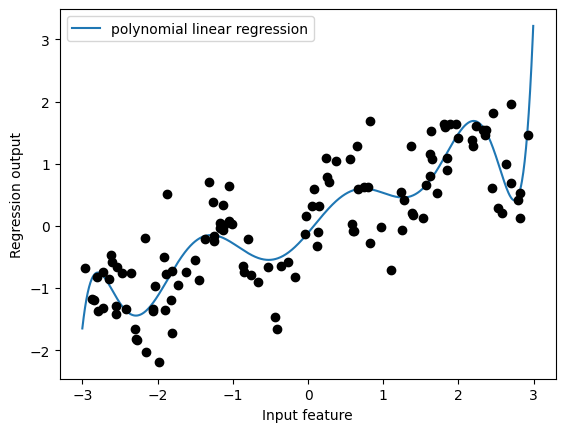

In [56]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

As you can see, polynomial features yield a very smooth fit on this one-dimensional
data. However, polynomials of high degree tend to behave in extreme ways on the
boundaries or in regions with little data.

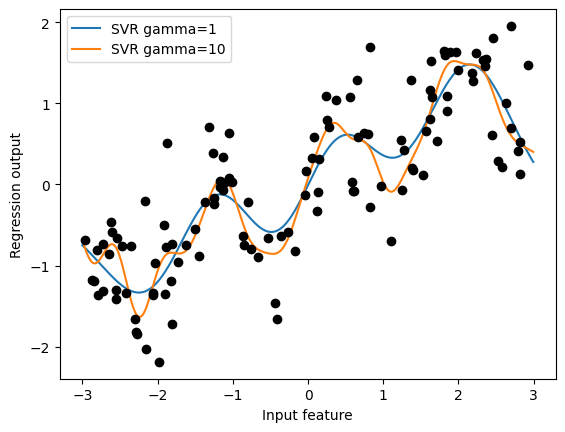

In [57]:
from sklearn.svm import SVR
for gamma in [1, 10]:
 svr = SVR(gamma=gamma).fit(X, y)
 plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")


Using a more complex model, a kernel SVM, we are able to learn a similarly complex
prediction to the polynomial regression without an explicit transformation of the
features.

As a more realistic application of interactions and polynomials, let’s look again at the
Boston Housing dataset.

In [59]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the California housing dataset
california = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=0)

# Rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
#Now, we extract polynomial features and interactions up to a degree of 2
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))


X_train.shape: (15480, 8)
X_train_poly.shape: (15480, 45)


The data originally had 13 features, which were expanded into 105 interaction fea‐
tures. These new features represent **all possible interactions between two different original features**, as well as the **square of each original feature**. degree=2 here means
that we look at all features that are the product of up to two original features. The exact correspondence between input and output features can be found using the
**get_feature_names method**

In [61]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names_out()))

Polynomial feature names:
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x0^2' 'x0 x1' 'x0 x2'
 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4'
 'x1 x5' 'x1 x6' 'x1 x7' 'x2^2' 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7'
 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7'
 'x5^2' 'x5 x6' 'x5 x7' 'x6^2' 'x6 x7' 'x7^2']


In [62]:
#Without interactions
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
 ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
 ridge.score(X_test_poly, y_test)))

Score without interactions: 0.584
Score with interactions: 0.605


In [63]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
 rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.795
Score with interactions: 0.809


You can see that even without additional features, the random forest beats the
performance of Ridge. Adding interactions and polynomials actually decreases per‐
formance slightly

## Univariate Nonlinear Transformations

We just saw that adding squared or cubed features can help linear models for regression. There are other transformations that often prove useful for transforming certain
features: in particular, applying mathematical functions like **log, exp, or sin**. 

While tree-based models only care about the ordering of the features, linear models and neural networks are very tied to the **scale and distribution of each feature**, and if there is a nonlinear relation between the feature and the target, that becomes hard to model particularly in regression. The functions log and exp can help by adjusting the relative scales in the data so that they can be captured better by a linear model or neural network

Most models work best when each feature (and in regression also the target) is loosely **Gaussian distributed**.

A particularly common case
when such a transformation can be helpful is when dealing with integer count data

In [71]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

# Calculate the number of feature appearances
bins = np.bincount(X[:, 0])
print("Number of feature appearances:\n{}".format(bins))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

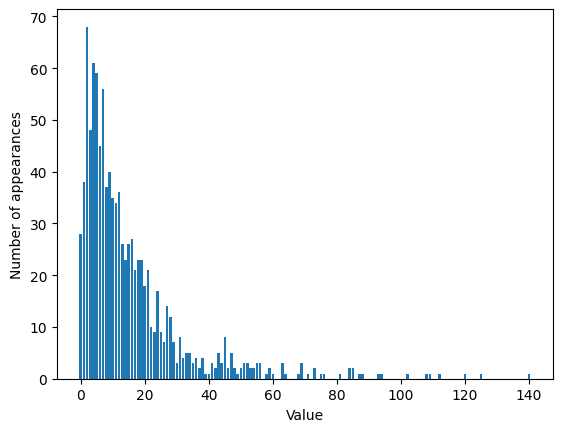

In [75]:
plt.bar(range(len(bins)), bins)
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [76]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


As you can see from the relatively low R² score, Ridge was not able to really capture the relationship between X and y. Applying a logarithmic transformation can help,
though. Because the value 0 appears in the data (and the logarithm is not defined at 0), we can’t actually just apply log, but we have to compute log(X + 1):

Text(0.5, 0, 'Value')

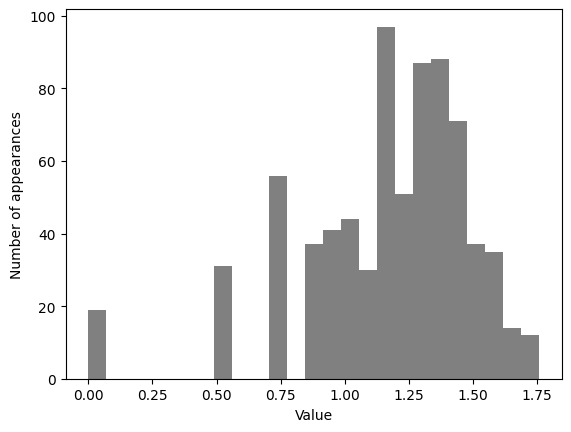

In [79]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)
plt.hist(np.log(X_train_log[:, 0] + 1), bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [80]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


Finding the transformation that works best for each combination of dataset and
model is somewhat of an art. In this example, all the features had the same properties.
This is rarely the case in practice, and usually only a subset of the features should be
transformed, or sometimes each feature needs to be transformed in a different way.

Sometimes it is also a good idea to
transform the target variable y in regression. Trying to predict counts (say, number of
orders) is a fairly common task, and using the log(y + 1) transformation often
helps

As you saw in the previous examples, **binning, polynomials, and interactions** can
have a **huge influence on how models perform on a given dataset**. This is particularly
true for less complex models like linear models and naive Bayes models. Tree-based
models, on the other hand, are often able to discover important interactions themselves, and don’t require transforming the data explicitly most of the time. Other
models, like SVMs, nearest neighbors, and neural networks, might sometimes benefit
from using binning, interactions, or polynomials, but the implications there are usu‐
ally much less clear than in the case of linear models.


## Automatic Feature Selection

With so many ways to create new features, you might get tempted to increase the dimensionality of the data way beyond the number of original features. However,
adding more features makes all models more complex, and so increases the chance of **overfitting**. 

When adding new features, or with high-dimensional datasets in general, it can be a good idea to **reduce the number of features to only the most useful ones**,
and discard the rest. This can lead to simpler models that generalize better. But how can you know how good each feature is? There are three basic strategies: **univariate statistics, model-based selection, and iterative selection**

### Univariate Statistics

In **univariate statistics**, we compute whether there is a **statistically significant relationship between each feature and the target**. Then the features that are related with the highest confidence are selected. In the case of classification, this is also known as **analysis of variance (ANOVA)**. A key property of these tests is that they are univariate, meaning that they only consider each feature individually

Univariate tests are often very fast to compute, and don’t require building a model. To use univariate feature selection in scikit-learn, you need to choose a test, usu‐
ally either **f_classif (the default) for classification** or **f_regression for regression**, and a method to discard features based on the p-values determined in the test. All
methods for discarding parameters use a **threshold** to discard all features with too high a p-value.

The methods differ in how they compute this threshold, with the simplest ones being **SelectKBest**, which selects a fixed number k of features, and **SelectPercentile**, which selects
a fixed percentage of features

In [81]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(
 X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))


X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

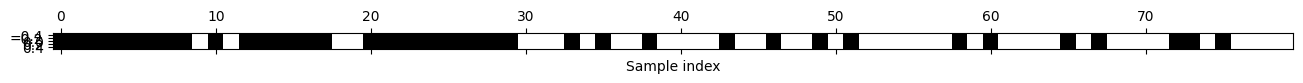

In [82]:
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")


As you can see from the visualization of the mask, most of the selected features are
the original features, and most of the noise features were removed. However, the
recovery of the original features is not perfect

In [83]:
from sklearn.linear_model import LogisticRegression
# transform test data
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
 lr.score(X_test_selected, y_test)))


Score with all features: 0.919
Score with only selected features: 0.916


c:\Users\bapdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bapdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Univariate feature selection can still be very
helpful, though, if there is such a large number of features that building a model on
them is infeasible, or if you suspect that many features are completely uninformative.


### Model-Based Feature Selection

**Model-based feature selection** uses a supervised machine learning model to **judge the importance of each feature, and keeps only the most important ones**. The supervised
model that is used for feature selection doesn’t need to be the same model that is used for the final supervised modeling. The feature selection model needs to provide some
measure of importance for each feature, so that they can be ranked by this measure. Decision trees and decision tree–based models provide a feature_importances_attribute, which directly encodes the importance of each feature. Linear models have
coefficients, which can also be used to capture feature importances by considering the
absolute values


In [84]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
 RandomForestClassifier(n_estimators=100, random_state=42),
 threshold="median")


The SelectFromModel class selects all features that have an importance measure of
the feature (as provided by the supervised model) greater than the provided thresh‐
old. 

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Sample index')

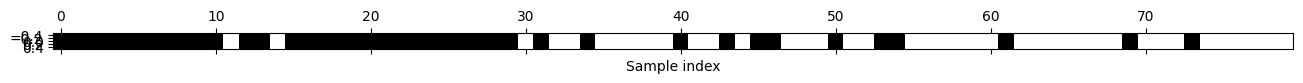

In [86]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))
mask = select.get_support()
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")


In [87]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))


Test score: 0.930


c:\Users\bapdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Iterative Feature Selection

In **univariate testing** we used no model, while in model-based selection we used a single model to select features. In iterative feature selection, a series of models are built, with varying numbers of features. 

There are two basic methods: **starting with no features and adding features one by one** until some stopping criterion is reached, or **starting with all features and removing features one by one** until some stopping criterion is reached. 

Because a series of models are built, these methods are much more computationally expensive than the methods we discussed previously. One particular method of this kind is **recursive feature elimination (RFE)**, which starts with all features, builds a model, and discards the least important feature according to the
model. Then a new model is built using all but the discarded feature, and so on until only a prespecified number of features are left.

Text(0.5, 0, 'Sample index')

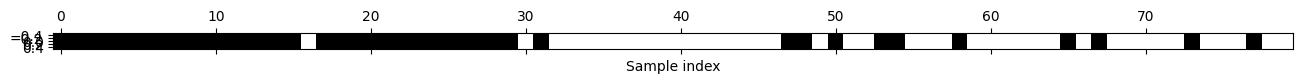

In [88]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
 n_features_to_select=40)
select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")


In [91]:
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

#Or we can use the model inside RSE to make predictions
print("Test score: {:.3f}".format(select.score(X_test, y_test)))


Test score: 0.930
Test score: 0.951


c:\Users\bapdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


If you are unsure when selecting what to use as input to your machine learning algorithms, automatic feature selection can be quite helpful. It is also great for reducing
the amount of features needed

## Utilizing Expert Knowledge

**Feature engineering** is often an important place to use expert knowledge for a particular application. While the purpose of machine learning in many cases is to avoid having to create a set of expert-designed rules, that doesn’t mean that prior knowledge of the application or domain should be discarded. Often, domain experts can help in identifying useful features that are much more informative than the initial representation of the data

In New York, Citi Bike operates a network of bicycle rental stations with a subscrip‐
tion system. The stations are all over the city and provide a convenient way to get
around. Bike rental data is made public in an anonymized form and has been ana‐
lyzed in various ways. The task we want to solve is to predict for a given time and day
how many people will rent a bike in front of Andreas’s house—so he knows if any
bikes will be left for him.


Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

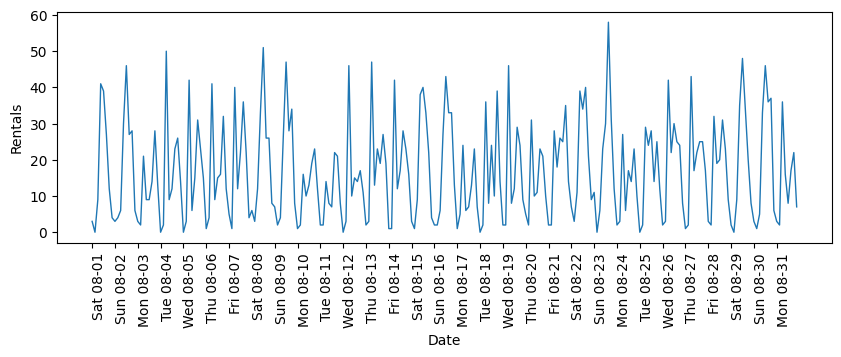

In [94]:
citibike = mglearn.datasets.load_citibike()
print("Citi Bike data:\n{}".format(citibike.head()))
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
 freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")


Looking at the data, we can clearly distinguish day and night for each 24-hour inter‐
val. The patterns for weekdays and weekends also seem to be quite different. When
evaluating a prediction task on a time series like this, we usually want to learn from
the past and predict for the future. This means when doing a split into a training and a
test set, we want to use all the data up to a certain date as the training set and all the
data past that date as the test set.

We will use the first 184 data points, corresponding to the first 23
days, as our training set, and the remaining 64 data points, corresponding to the
remaining 8 days, as our test set.

The only feature that we are using in our prediction task is the date and time when a
particular number of rentals occurred. So, the input feature is the date and time—say,
2015-08-01 00:00:00—and the output is the number of rentals in the following
three hours

In [97]:
# extract the target values (number of rentals)
y = citibike.values
# convert to POSIX time by dividing by 10**9
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [98]:

# use the first 184 data points for training, the rest for testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


<Figure size 640x480 with 0 Axes>

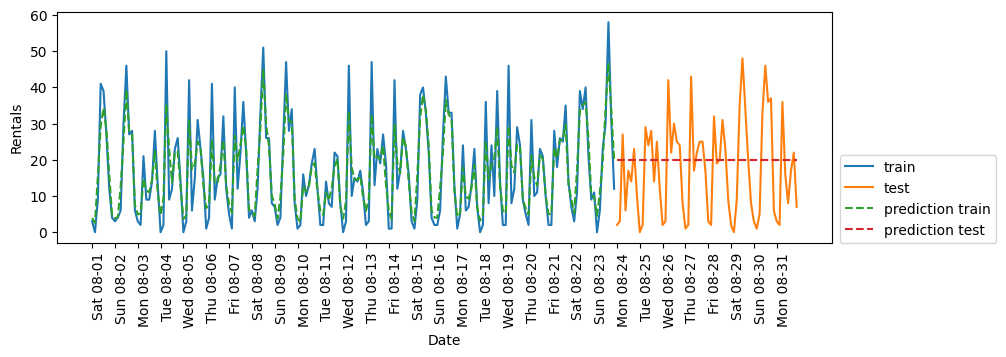

In [99]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

The predictions on the training set are quite good, as is usual for random forests.
However, for the test set, a constant line is predicted. The R² is –0.03, which means
that we learned nothing. What happened?

The problem lies in the combination of our feature and the random forest. The value of the POSIX time feature for the test set is **outside of the range of the feature values in the training set**: the points in the test set have timestamps that are later than all the
points in the training set. Trees, and therefore **random forests, cannot extrapolate to feature ranges outside the training set.** The result is that the model simply predicts the
target value of the closest point in the training set—which is the last time it observed
any data.

From looking at the rental figures in the training data, two factors seem to be very
important: the time of day and the day of the week. So, let’s add these two features.
We can’t really learn anything from the POSIX time, so we drop that feature. First,
let’s use only the hour of the day

Test-set R^2: 0.60


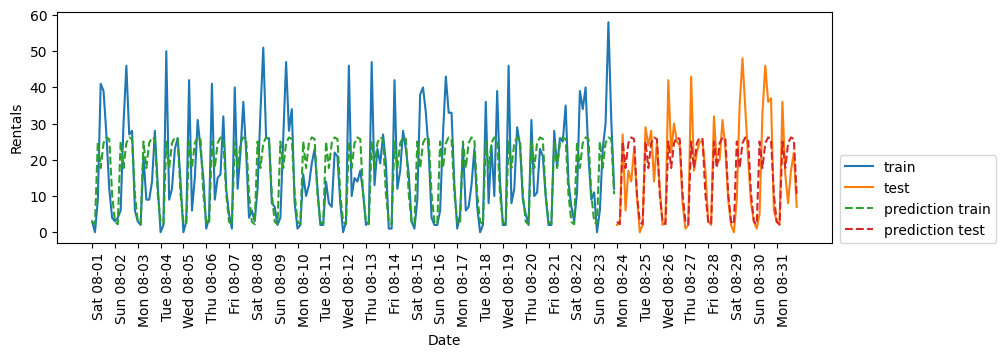

In [102]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

Test-set R^2: 0.84


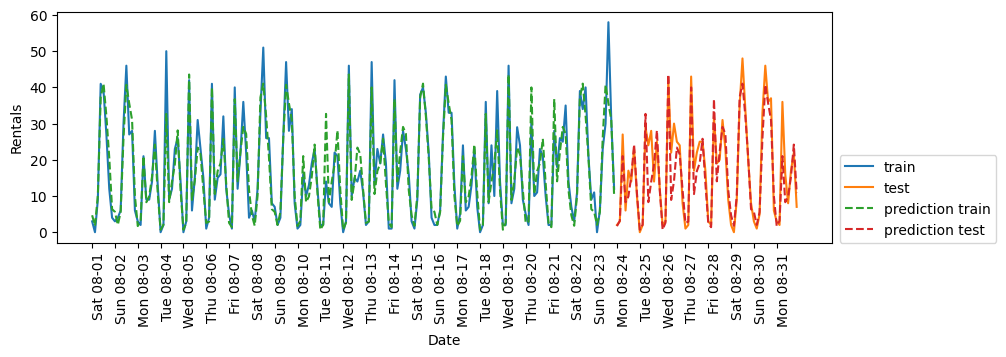

In [105]:
#Let's add the day of the week
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Now we have a model that captures the periodic behavior by considering the day of
week and time of day. It has an R² of 0.84, and shows pretty good predictive perfor‐
mance. What this model likely is learning is the mean number of rentals for each
combination of weekday and time of day from the first 23 days of August. This
actually does not require a complex model like a random forest, so let’s try with a
simpler model, LinearRegression

Test-set R^2: 0.13


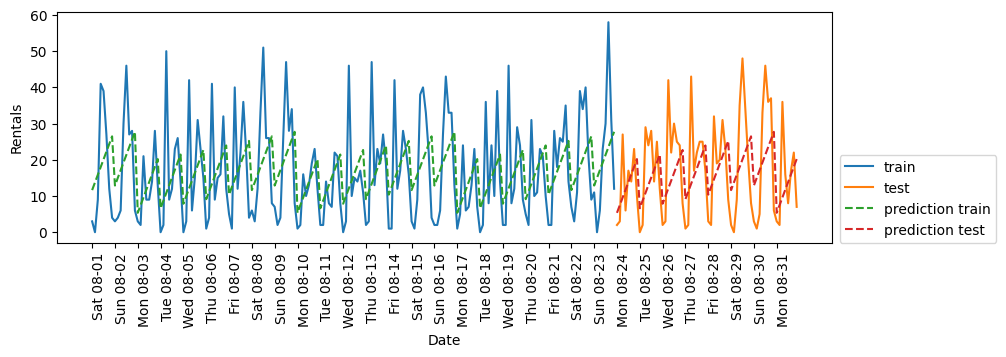

In [106]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())


The rea‐
son for this is that we encoded day of week and time of day using integers, which are
interpreted as categorical variables. Therefore, the linear model can only learn a lin‐
ear function of the time of day—and it learned that later in the day, there are more
rentals. However, the patterns are much more complex than that. We can capture this
by interpreting the integers as categorical variables, by transforming them using One
HotEncoder

Test-set R^2: 0.62


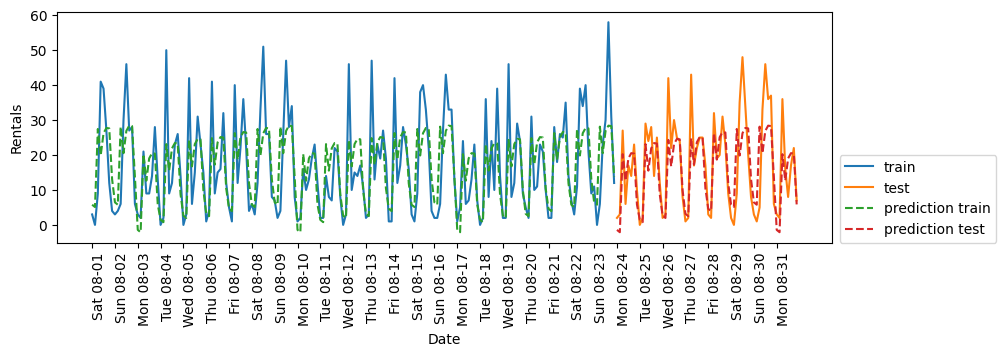

In [108]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())


Test-set R^2: 0.85


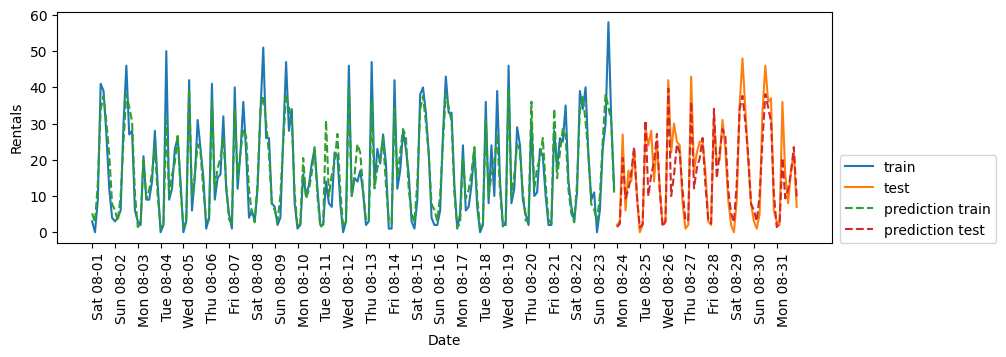

In [109]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
 include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)


Text(0, 0.5, 'Feature')

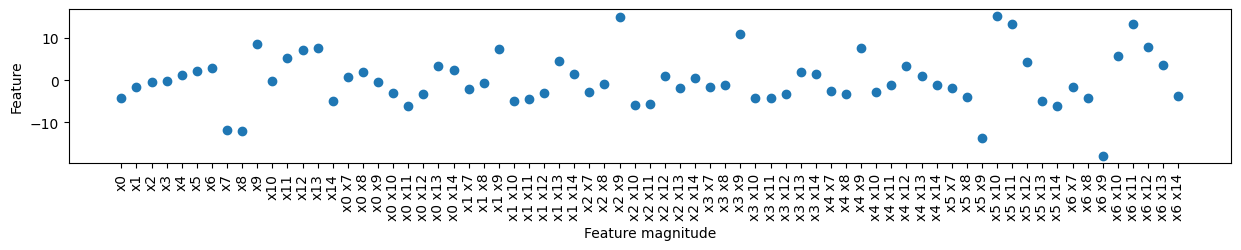

In [111]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour
features_poly = poly_transformer.get_feature_names_out()
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature magnitude")
plt.ylabel("Feature")


## SUMMARY

We emphasized the importance of representing data in a way
that is suitable for the machine learning algorithm—for example, by one-hotencoding categorical variables. We also discussed the importance of engineering new
features, and the possibility of utilizing expert knowledge in creating derived features
from your data. In particular, linear models might benefit greatly from generating
new features via binning and adding polynomials and interactions, while more com‐
plex, nonlinear models like random forests and SVMs might be able to learn more
complex tasks without explicitly expanding the feature space. In practice, the features
that are used (and the match between features and method) is often the most impor‐
tant piece in making a machine learning approach work well.
